## Libraries

First, you need to install [arcplot](https://github.com/szkics/arcplot) with the following command: `pip install arcplot` (you need **Python 3.10** to install it!).

We'll also need the following libraries:
- [pandas](https://python-graph-gallery.com/pandas/) for creating a dataframe with our data

In [1]:
import pandas as pd
from arcplot import ArcDiagram

## Dataset

Arc diagrams are mainly used to represent **networks**. Networks are made up of *nodes* (e.g. people) and *edges* (relationships between people). The relationship may be a collaboration or a family relationship for example.

In our case, we'll use a simple connection dataset where each row is an edge. It has 4 columns:
- **from**: id of the node
- **to**: id of the node in relation with **from**
- **weight**: weight of the edge
- **position**: boolean used to choose where to plot the arc (see below)

In [7]:
path = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/connections.csv'
df = pd.read_csv(path)

## Simplest arc diagram

The easiest way is to create a function that will take the following arguments:
- `df`: a pandas dataframe
- `node1`: column name of the node
- `node2`: column name of the node related to node1

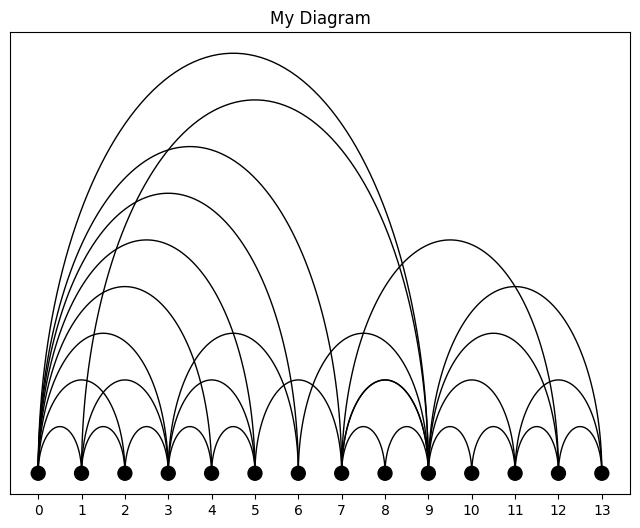

In [8]:
def createArcDiagram(df, node1, node2, edgecolor='black', title='My Diagram'):
    
    # get all the nodes
    nodes = df[node1].unique().tolist() + df[node2].unique().tolist()
    nodes = list(set(nodes))

    # create the diagram
    arcdiag = ArcDiagram(nodes, title)

    # connect the nodes
    for connection in df.iterrows():
        arcdiag.connect(connection[1][node1], connection[1][node2])

    arcdiag.set_custom_colors(['black']*len(nodes))

    # plot the diagram
    arcdiag.show_plot()

createArcDiagram(
    df,
    node1='from',
    node2='to'
)

## Custom colors

Thanks to `set_background_color()` and `set_color_map()` we can **custom the color** of the chart. We just have to add those in our function from above:

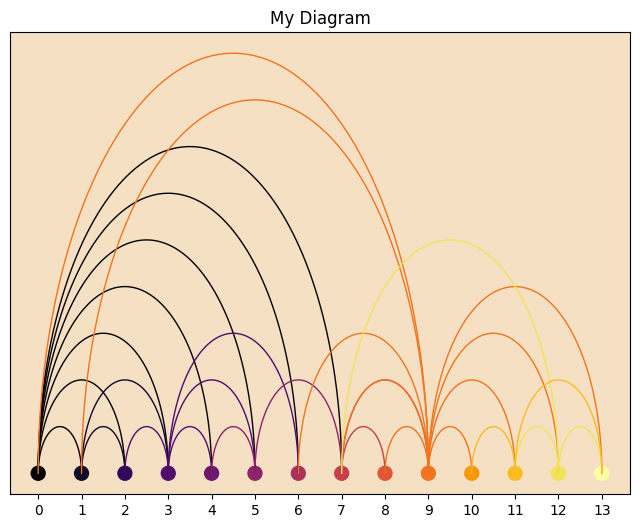

In [12]:
def createArcDiagram(df, node1, node2, bg_color='white',
                     cmap='viris', title='My Diagram'):
    
    # get all the nodes
    nodes = df[node1].unique().tolist() + df[node2].unique().tolist()
    nodes = list(set(nodes))

    # create the diagram
    arcdiag = ArcDiagram(nodes, title)

    # connect the nodes
    for connection in df.iterrows():
        arcdiag.connect(connection[1][node1], connection[1][node2])

    # custom colors
    arcdiag.set_background_color(bg_color)
    arcdiag.set_color_map(cmap)
    
    # plot the diagram
    arcdiag.show_plot()

createArcDiagram(
    df,
    node1='from',
    node2='to',
    bg_color='#f5e0c4',
    cmap='inferno'
)

## Weighed relationships

It's common to have **weighed edges** in a graph. For example, if edges are collaboration, the weight can be the number of collaboration.

[arcplot](https://github.com/szkics/arcplot) has a solution for this with the `linewidth` argument. Once again, let's update our function:

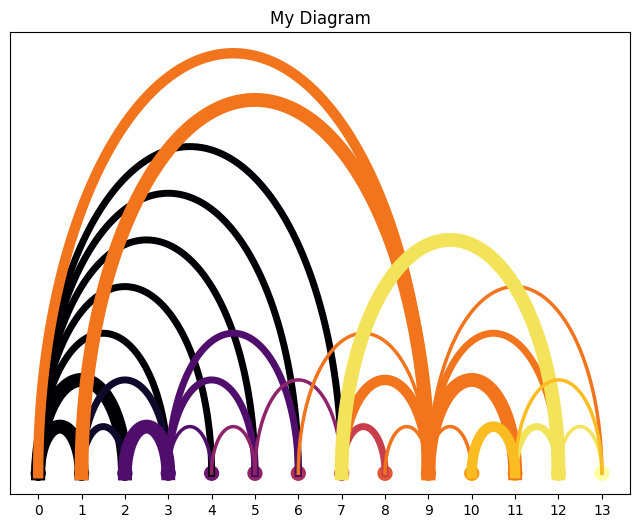

In [13]:
def createArcDiagram(df, node1, node2, weights=None, bg_color='white',
                     cmap='viris', title='My Diagram'):
    
    # get all the nodes
    nodes = df[node1].unique().tolist() + df[node2].unique().tolist()
    nodes = list(set(nodes))

    # create the diagram
    arcdiag = ArcDiagram(nodes, title)

    if not weights:
        df['weights'] = 0.1

    # connect the nodes
    for connection in df.iterrows():
        arcdiag.connect(
            connection[1][node1],
            connection[1][node2],
            linewidth=connection[1][weights]
        )

    # custom colors
    arcdiag.set_background_color(bg_color)
    arcdiag.set_color_map(cmap)
    
    # plot the diagram
    arcdiag.show_plot()

createArcDiagram(
    df,
    node1='from',
    node2='to',
    weights='weights',
    cmap='inferno'
)

## Display arcs above OR below

Finally, we can easily decide on **which side of the plot** each arc will be with the `arc_position` argument. Let's update one last time our function:

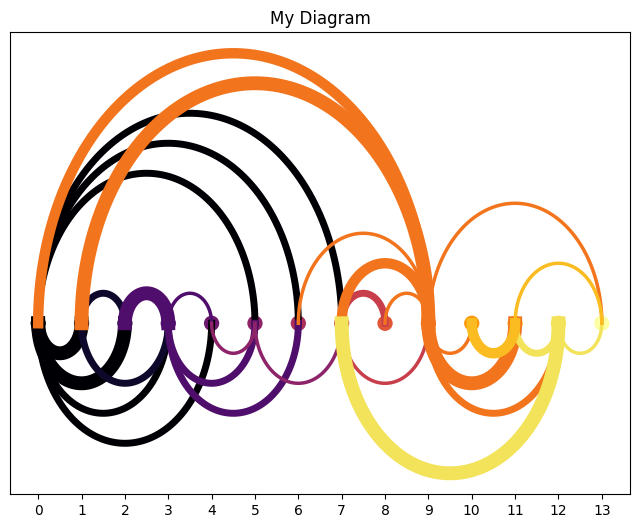

In [14]:
def createArcDiagram(data, node1, node2, weights=None, positions=None,
                     bg_color='white', cmap='viris', title='My Diagram'):

    df = data.copy()
    
    # get all the nodes
    nodes = df[node1].unique().tolist() + df[node2].unique().tolist()
    nodes = list(set(nodes))

    # create the diagram
    arcdiag = ArcDiagram(nodes, title)

    # get positions
    if positions:
        if df[positions].nunique() != 2:
            raise ValueError('positions must have 2 unique values')
        else:
            posMap = {
                df[positions].unique()[0]: 'below',
                df[positions].unique()[1]: 'above'
            }
            df['position'] = df[positions].map(posMap)
    else:
        df['position'] = 'above'

    if not weights:
        df['weights'] = 0.1

    # connect the nodes
    for connection in df.iterrows():
        arcdiag.connect(
            connection[1][node1],
            connection[1][node2],
            linewidth=connection[1][weights],
            arc_position=connection[1]['position']
        )

    # custom colors
    arcdiag.set_background_color(bg_color)
    arcdiag.set_color_map(cmap)
    
    # plot the diagram
    arcdiag.show_plot()

createArcDiagram(
    df,
    node1='from',
    node2='to',
    weights='weights',
    positions='position',
    cmap='inferno'
)

## Going further 

This post explains **how to create an arc diagram** with the [arcplot](https://github.com/szkics/arcplot) library.

You might be interested in:
- building [network diagram](https://python-graph-gallery.com/network-chart/)
- creating [chord diagram](https://python-graph-gallery.com/chord-diagram/)